## Задача.

Выполните задания, по каждому варианту напишите точность распознавания на проверочной выборке и сделайте выводы.

Запустите нейронку c bag of words (01) при разных maxWordsCount:
- 100
- 1000
- 10000
- 50000

Запустите нейронку c bag of words (01) при maxWordsCount = 20000 и разных архитектурах:
- Поменяйте количество нейронов в слоях
- Поменяйте количество слоев
- Поменяйте активационные функции слоев

Запустите нейронку c Embbedding при maxWordsCount = 50000, поменяйте размер Embedding пространства:
- 10
- 50
- 200


In [0]:
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from google.colab import drive

In [0]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls

drive  sample_data  texts


In [0]:
!unzip -q '/content/drive/My Drive/Тексты писателей.zip' -d /content/texts

In [0]:
def readText(fileName):
  f = open(fileName, 'r')
  text = f.read().replace('\n', ' ')
  return text

className = ["О. Генри", "Стругацкие", "Булгаков", "Саймак", "Фрай", "Брэдберри"]
nClasses = len(className)

In [0]:
trainText = []
testText = []


for i in className:
  for j in os.listdir('texts/'):
    if i in j:
      if 'Обучающая' in j: 
        trainText.append(readText('texts/' + j))
      if 'Тестовая' in j:
        testText.append(readText('texts/' + j))
print(len(trainText))

6


In [0]:
tokenizer = Tokenizer(num_words=20000, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0', lower=True, split=' ', oov_token='unknown', char_level=False)
tokenizer.fit_on_texts(trainText)

In [0]:
trainWordIndexes = tokenizer.texts_to_sequences(trainText)
testWordIndexes = tokenizer.texts_to_sequences(testText)

In [0]:
def getSetFromIndexes(wordIndexes, xLen, step):
  xSample = []
  wordsLen = len(wordIndexes)
  index = 0
  while (index + xLen <= wordsLen):
    xSample.append(wordIndexes[index:index+xLen])
    index += step
  return xSample

In [0]:
def createSetsMultiClasses(wordIndexes, xLen, step):
  nClasses = len(wordIndexes)
  classesXSamples = []
  for wI in wordIndexes:
    classesXSamples.append(getSetFromIndexes(wI, xLen, step)) 
  xSamples = []
  ySamples = []
  for t in range(nClasses):
    xT = classesXSamples[t]
    for i in range(len(xT)):
      xSamples.append(xT[i])
      ySamples.append(utils.to_categorical(t, nClasses))
  xSamples = np.array(xSamples)
  ySamples = np.array(ySamples)
  return (xSamples, ySamples)

In [0]:
xTrain, yTrain = createSetsMultiClasses(trainWordIndexes, 1000, 100)
xTest, yTest = createSetsMultiClasses(testWordIndexes, 1000, 100)

In [0]:
xTrain01 = tokenizer.sequences_to_matrix(xTrain.tolist())
xTest01 = tokenizer.sequences_to_matrix(xTest.tolist())

Epoch 1/10
138/138 [==============================] - 2s 14ms/step - loss: 0.4062 - accuracy: 0.9575 - val_loss: 0.6255 - val_accuracy: 0.8328
Epoch 2/10
138/138 [==============================] - 2s 12ms/step - loss: 0.1048 - accuracy: 0.9439 - val_loss: 0.4493 - val_accuracy: 0.8681
Epoch 3/10
138/138 [==============================] - 2s 12ms/step - loss: 0.0704 - accuracy: 0.9451 - val_loss: 0.3697 - val_accuracy: 0.8744
Epoch 4/10
138/138 [==============================] - 2s 12ms/step - loss: 0.0544 - accuracy: 0.9517 - val_loss: 0.2807 - val_accuracy: 0.9113
Epoch 5/10
138/138 [==============================] - 2s 12ms/step - loss: 0.0427 - accuracy: 0.9563 - val_loss: 0.2966 - val_accuracy: 0.8978
Epoch 6/10
138/138 [==============================] - 2s 14ms/step - loss: 0.0395 - accuracy: 0.9620 - val_loss: 0.3034 - val_accuracy: 0.8940
Epoch 7/10
138/138 [==============================] - 2s 16ms/step - loss: 0.0183 - accuracy: 0.9891 - val_loss: 0.2381 - val_accuracy: 0.9179

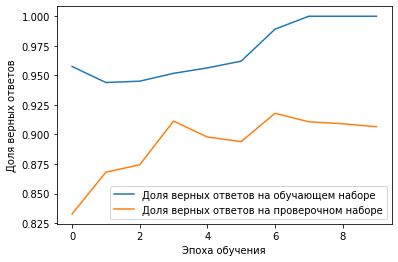

In [0]:
# baseline
model01 = Sequential()
model01.add(Dense(200, input_dim=20000, activation="relu"))
model01.add(Dropout(0.25))
model01.add(BatchNormalization())
model01.add(Dense(6, activation='sigmoid'))
model01.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = model01.fit(xTrain01, 
                      yTrain, 
                      epochs=10,
                      batch_size=128,
                      validation_data=(xTest01, yTest))

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

## Part I

maxWordsCount:  100


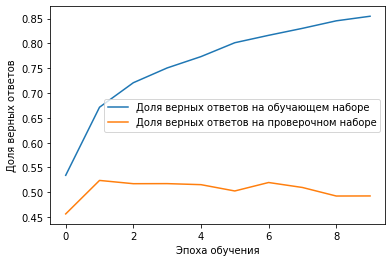

maxWordsCount:  1000


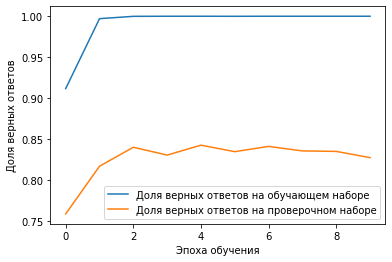

maxWordsCount:  10000


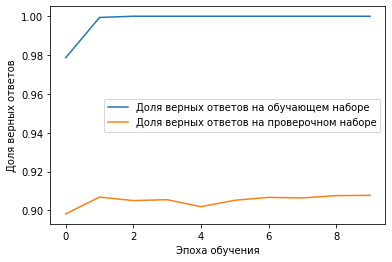

maxWordsCount:  50000


In [0]:
l_maxWordsCount = [100, 1000, 10000, 50000]

for maxWordsCount in l_maxWordsCount:
  print('maxWordsCount: ', maxWordsCount)
  tokenizer = Tokenizer(num_words=maxWordsCount, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0', lower=True, split=' ', oov_token='unknown', char_level=False)
  tokenizer.fit_on_texts(trainText)
  trainWordIndexes = tokenizer.texts_to_sequences(trainText)
  testWordIndexes = tokenizer.texts_to_sequences(testText)
  xTrain, yTrain = createSetsMultiClasses(trainWordIndexes, 1000, 100)
  xTest, yTest = createSetsMultiClasses(testWordIndexes, 1000, 100)
  xTrain01 = tokenizer.sequences_to_matrix(xTrain.tolist())
  xTest01 = tokenizer.sequences_to_matrix(xTest.tolist())

  model01 = Sequential()
  model01.add(Dense(200, input_dim=maxWordsCount, activation="relu"))
  model01.add(Dropout(0.25))
  model01.add(BatchNormalization())
  model01.add(Dense(6, activation='sigmoid'))
  model01.compile(optimizer='adam', 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])

  history = model01.fit(xTrain01, 
                        yTrain, 
                        epochs=10,
                        batch_size=128,
                        validation_data=(xTest01, yTest),
                        verbose=0)

  plt.plot(history.history['accuracy'], 
          label='Доля верных ответов на обучающем наборе')
  plt.plot(history.history['val_accuracy'], 
          label='Доля верных ответов на проверочном наборе')
  plt.xlabel('Эпоха обучения')
  plt.ylabel('Доля верных ответов')
  plt.legend()
  plt.show()

### Вывод: 

Очевидный)) Слов не должно быть слишком мало и нет смысла делать слишком много. Но пожалуй лучше переборщить, чем недобрать. Скажем можно было бы поэкспериментировать с 25000, 30000. Но могут возникнуть проблемы с RAM, как у меня при 50000.

## Part II

Меняем количество нейронов в сетях.

Epoch 1/10
138/138 [==============================] - 2s 14ms/step - loss: 0.2599 - accuracy: 0.9815 - val_loss: 0.5090 - val_accuracy: 0.9176
Epoch 2/10
138/138 [==============================] - 2s 13ms/step - loss: 0.0267 - accuracy: 0.9978 - val_loss: 0.3186 - val_accuracy: 0.9227
Epoch 3/10
138/138 [==============================] - 2s 13ms/step - loss: 0.0053 - accuracy: 0.9999 - val_loss: 0.2776 - val_accuracy: 0.9222
Epoch 4/10
138/138 [==============================] - 2s 13ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.2696 - val_accuracy: 0.9186
Epoch 5/10
138/138 [==============================] - 2s 13ms/step - loss: 9.7261e-04 - accuracy: 1.0000 - val_loss: 0.2609 - val_accuracy: 0.9203
Epoch 6/10
138/138 [==============================] - 2s 13ms/step - loss: 6.2268e-04 - accuracy: 1.0000 - val_loss: 0.2666 - val_accuracy: 0.9189
Epoch 7/10
138/138 [==============================] - 2s 16ms/step - loss: 4.7472e-04 - accuracy: 1.0000 - val_loss: 0.2625 - val_accu

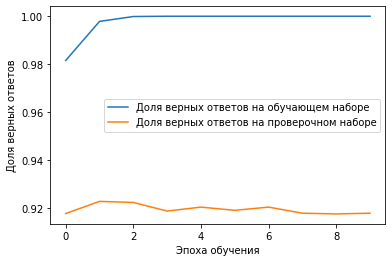

In [0]:
maxWordsCount = 20000
tokenizer = Tokenizer(num_words=maxWordsCount, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0', lower=True, split=' ', oov_token='unknown', char_level=False)
tokenizer.fit_on_texts(trainText)
trainWordIndexes = tokenizer.texts_to_sequences(trainText)
testWordIndexes = tokenizer.texts_to_sequences(testText)
xTrain, yTrain = createSetsMultiClasses(trainWordIndexes, 1000, 100)
xTest, yTest = createSetsMultiClasses(testWordIndexes, 1000, 100)
xTrain01 = tokenizer.sequences_to_matrix(xTrain.tolist())
xTest01 = tokenizer.sequences_to_matrix(xTest.tolist())

model01 = Sequential()
model01.add(Dense(600, input_dim=maxWordsCount, activation="relu"))
model01.add(Dropout(0.25))
model01.add(BatchNormalization())
model01.add(Dense(6, activation='sigmoid'))
model01.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = model01.fit(xTrain01, 
                      yTrain, 
                      epochs=10,
                      batch_size=128,
                      validation_data=(xTest01, yTest),
                      verbose=1)

plt.plot(history.history['accuracy'], 
        label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
        label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Добавим пару слоев.

Epoch 1/10
138/138 [==============================] - 2s 14ms/step - loss: 0.4814 - accuracy: 0.8870 - val_loss: 0.7211 - val_accuracy: 0.6294
Epoch 2/10
138/138 [==============================] - 2s 12ms/step - loss: 0.2303 - accuracy: 0.7538 - val_loss: 0.7006 - val_accuracy: 0.6665
Epoch 3/10
138/138 [==============================] - 2s 14ms/step - loss: 0.2105 - accuracy: 0.7197 - val_loss: 0.6994 - val_accuracy: 0.6588
Epoch 4/10
138/138 [==============================] - 2s 12ms/step - loss: 0.2085 - accuracy: 0.7098 - val_loss: 0.7684 - val_accuracy: 0.6409
Epoch 5/10
138/138 [==============================] - 2s 12ms/step - loss: 0.2077 - accuracy: 0.7069 - val_loss: 0.8537 - val_accuracy: 0.6078
Epoch 6/10
138/138 [==============================] - 2s 14ms/step - loss: 0.2073 - accuracy: 0.7054 - val_loss: 0.7939 - val_accuracy: 0.6211
Epoch 7/10
138/138 [==============================] - 2s 13ms/step - loss: 0.2072 - accuracy: 0.7038 - val_loss: 0.8066 - val_accuracy: 0.6102

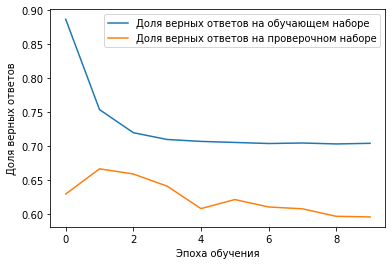

In [0]:
tokenizer = Tokenizer(num_words=20000, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0', lower=True, split=' ', oov_token='unknown', char_level=False)
tokenizer.fit_on_texts(trainText)
trainWordIndexes = tokenizer.texts_to_sequences(trainText)
testWordIndexes = tokenizer.texts_to_sequences(testText)
xTrain, yTrain = createSetsMultiClasses(trainWordIndexes, 1000, 100)
xTest, yTest = createSetsMultiClasses(testWordIndexes, 1000, 100)
xTrain01 = tokenizer.sequences_to_matrix(xTrain.tolist())
xTest01 = tokenizer.sequences_to_matrix(xTest.tolist())

model01 = Sequential()
model01.add(Dense(200, input_dim=20000, activation="relu"))
model01.add(Dropout(0.25))
model01.add(Dense(100, activation='relu'))
model01.add(Dense(200, activation='relu'))
model01.add(BatchNormalization())
model01.add(Dense(6, activation='sigmoid'))
model01.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = model01.fit(xTrain01, 
                      yTrain, 
                      epochs=10,
                      batch_size=128,
                      validation_data=(xTest01, yTest),
                      verbose=1)

plt.plot(history.history['accuracy'], 
        label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
        label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Изменим функции активации.

Epoch 1/10
138/138 [==============================] - 2s 14ms/step - loss: 0.3725 - accuracy: 0.9777 - val_loss: 0.7898 - val_accuracy: 0.8480
Epoch 2/10
138/138 [==============================] - 2s 12ms/step - loss: 0.0990 - accuracy: 0.9867 - val_loss: 0.5968 - val_accuracy: 0.8765
Epoch 3/10
138/138 [==============================] - 2s 12ms/step - loss: 0.0408 - accuracy: 0.9938 - val_loss: 0.3609 - val_accuracy: 0.9083
Epoch 4/10
138/138 [==============================] - 2s 13ms/step - loss: 0.0150 - accuracy: 0.9984 - val_loss: 0.3078 - val_accuracy: 0.9152
Epoch 5/10
138/138 [==============================] - 2s 13ms/step - loss: 0.0035 - accuracy: 0.9999 - val_loss: 0.2585 - val_accuracy: 0.9213
Epoch 6/10
138/138 [==============================] - 2s 12ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.2732 - val_accuracy: 0.9167
Epoch 7/10
138/138 [==============================] - 2s 12ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.2728 - val_accuracy: 0.9146

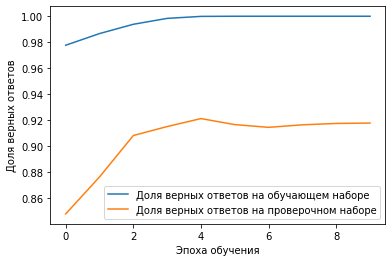

In [0]:
tokenizer = Tokenizer(num_words=20000, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0', lower=True, split=' ', oov_token='unknown', char_level=False)
tokenizer.fit_on_texts(trainText)
trainWordIndexes = tokenizer.texts_to_sequences(trainText)
testWordIndexes = tokenizer.texts_to_sequences(testText)
xTrain, yTrain = createSetsMultiClasses(trainWordIndexes, 1000, 100)
xTest, yTest = createSetsMultiClasses(testWordIndexes, 1000, 100)
xTrain01 = tokenizer.sequences_to_matrix(xTrain.tolist())
xTest01 = tokenizer.sequences_to_matrix(xTest.tolist())

model01 = Sequential()
model01.add(Dense(200, input_dim=20000, activation="linear"))
model01.add(Dropout(0.25))
model01.add(BatchNormalization())
model01.add(Dense(6, activation='sigmoid'))
model01.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = model01.fit(xTrain01, 
                      yTrain, 
                      epochs=10,
                      batch_size=128,
                      validation_data=(xTest01, yTest),
                      verbose=1)

plt.plot(history.history['accuracy'], 
        label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
        label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

### Итоги.

Увеличение количество нейронов положительно сказалось на нейросети, изменение функции активации почти не повлияло. А вот усложнение архитектуры нейросети привело к разительному ухудшение результатов на проверочной выборке. 

Это говорит о том, что начинать поиски нужно с простых нейросетей.

## Part III

Here:  10


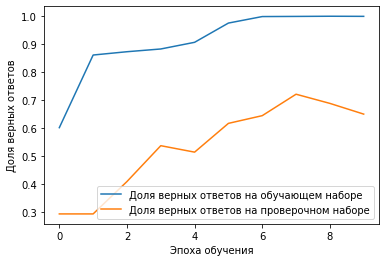

Here:  50


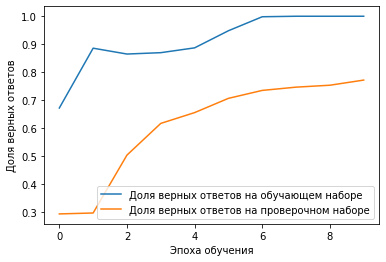

Here:  200


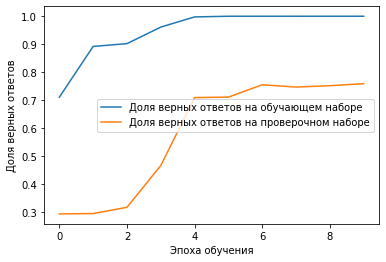

In [0]:
list_e = [10, 50, 200]
for e in list_e:
  print('Here: ', e)
  modelE = Sequential()
  modelE.add(Embedding(50000, e, input_length=1000))
  modelE.add(SpatialDropout1D(0.2))
  modelE.add(Flatten())
  modelE.add(BatchNormalization())
  modelE.add(Dense(200, activation="relu"))
  modelE.add(Dropout(0.2))
  modelE.add(BatchNormalization())
  modelE.add(Dense(6, activation='sigmoid'))

  modelE.compile(optimizer='adam', 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])
  
  history = modelE.fit(xTrain, 
                    yTrain, 
                    epochs=10,
                    batch_size=128,
                    validation_data=(xTest, yTest),
                    verbose=0)


  plt.plot(history.history['accuracy'], 
          label='Доля верных ответов на обучающем наборе')
  plt.plot(history.history['val_accuracy'], 
          label='Доля верных ответов на проверочном наборе')
  plt.xlabel('Эпоха обучения')
  plt.ylabel('Доля верных ответов')
  plt.legend()
  plt.show()

### Итоги.

Этот метод работает у нас хуже. Но наверное, если бы мы использовали сторонние топовые нейронки он бы дал преимущество. 

Сам параметр в целом от увеличения улучшает показатели. Но между 50 и 200 разницы уже практически нету.

(остальные выводы были выше в соответсвующих пунктах)